<a href="https://colab.research.google.com/github/Vinuthna06reddy/VinuthnaReddy_INFO5731_FALL2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Ensure you have the necessary resources
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

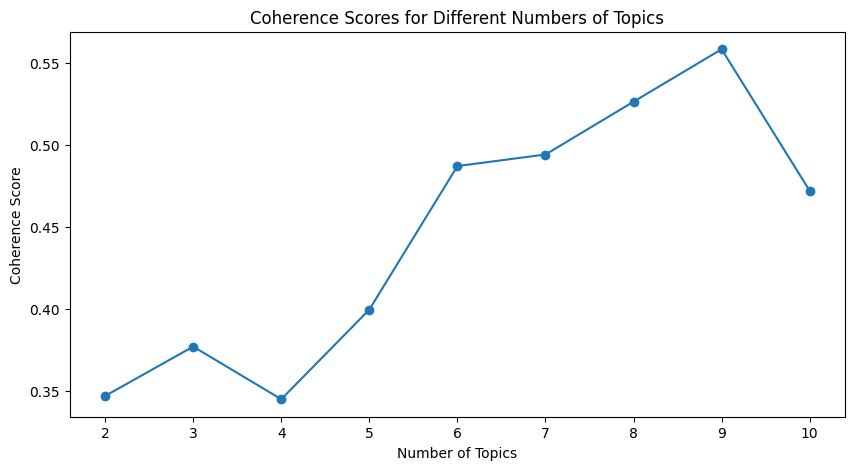

Optimal number of topics: 9
(0, '0.075*"new" + 0.075*"many" + 0.075*"artificial" + 0.075*"intelligence" + 0.075*"industries"')
(1, '0.087*"global" + 0.087*"education" + 0.087*"keep" + 0.087*"necessary" + 0.087*"standards"')
(2, '0.087*"climate" + 0.087*"critical" + 0.087*"act" + 0.087*"issue" + 0.087*"change"')
(3, '0.094*"experts" + 0.094*"improving" + 0.094*"inflation" + 0.094*"economy" + 0.094*"worry"')
(4, '0.016*"new" + 0.016*"worry" + 0.016*"global" + 0.016*"policies" + 0.016*"renewable"')
(5, '0.016*"new" + 0.016*"renewable" + 0.016*"many" + 0.016*"experts" + 0.016*"global"')
(6, '0.081*"new" + 0.081*"gadgets" + 0.081*"technology" + 0.081*"frequently" + 0.081*"released"')
(7, '0.045*"awareness" + 0.045*"policies" + 0.045*"growing" + 0.045*"travel" + 0.045*"renewable"')
(8, '0.051*"making" + 0.051*"costs" + 0.051*"rise" + 0.051*"volatility" + 0.051*"shown"')
Topic Summary:
Topic 1: 0.075*"new" + 0.075*"many" + 0.075*"artificial" + 0.075*"intelligence" + 0.075*"industries"
Topic 2

In [ ]:
# Load your data
# Assuming the dataset is in a CSV file with a 'text' column
data = pd.read_csv('/content/sample_text_data.csv')  # Replace with your data file
documents = data['text'].values

# Text preprocessing function
def preprocess(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stop words and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') and word.isalpha()]
    return tokens

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]

# Create a dictionary and corpus needed for Topic Modeling
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Function to compute coherence score
def compute_coherence_values(corpus, dictionary, k, texts):
    lda_model = gensim.models.LdaModel(corpus, num_topics=k, id2word=dictionary, passes=15, random_state=42)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

# Compute coherence scores for a range of topics
coherence_values = []
model_list = []
topic_range = range(2, 11)  # You can adjust this range based on your needs

for k in topic_range:
    model = gensim.models.LdaModel(corpus, num_topics=k, id2word=dictionary, passes=15, random_state=42)
    model_list.append(model)
    coherence_values.append(compute_coherence_values(corpus, dictionary, k, processed_docs))

import matplotlib.pyplot as plt

# Plotting the coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()

# Finding the optimal number of topics
optimal_k = topic_range[np.argmax(coherence_values)]
print(f'Optimal number of topics: {optimal_k}')

# Train the final LDA model with the optimal number of topics
final_lda_model = gensim.models.LdaModel(corpus, num_topics=optimal_k, id2word=dictionary, passes=15, random_state=42)

# Display the topics and their keywords
topics = final_lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
# Summarize topics based on the keywords
topic_summary = {}
for i, topic in enumerate(topics):
    topic_summary[f'Topic {i+1}'] = topic[1]  # Get the topic keywords

print("Topic Summary:")
for key, value in topic_summary.items():
    print(f"{key}: {value}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary resources
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Coherence Score for 2 topics: 0.9781253076001719
Coherence Score for 3 topics: 0.9832493932485825
Coherence Score for 4 topics: 0.9874370449364369
Coherence Score for 5 topics: 0.9899496359491495
Coherence Score for 6 topics: 0.9916246966242913
Coherence Score for 7 topics: 0.9928211685351068
Coherence Score for 8 topics: 0.9937185224682185
Coherence Score for 9 topics: 0.9944164644161941
Coherence Score for 10 topics: 0.9949748179745747


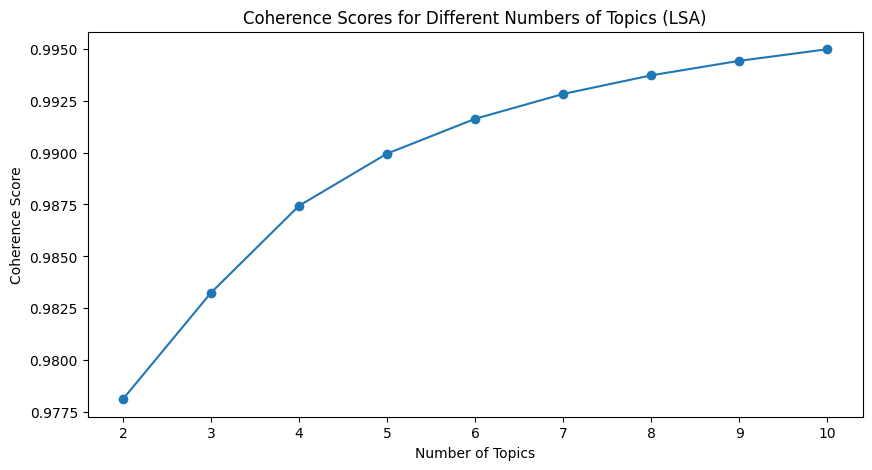


Optimal number of topics: 10
Topic 1: transforming, intelligence, artificial, many, new
Topic 2: necessary, standards, keep, education, global
Topic 3: people, healthcare, making, difficult, many
Topic 4: mental, awareness, health, resources, growing
Topic 5: improving, experts, economy, inflation, worry
Topic 6: travel, restrictions, easing, recover, beginning
Topic 7: issue, climate, change, need, act
Topic 8: government, renewable, energy, policies, debating
Topic 9: reform, necessary, keep, education, standards
Topic 10: industries, creating, transforming, intelligence, artificial

Topic Summary:
Topic 1: transforming, intelligence, artificial, many, new
Topic 2: necessary, standards, keep, education, global
Topic 3: people, healthcare, making, difficult, many
Topic 4: mental, awareness, health, resources, growing
Topic 5: improving, experts, economy, inflation, worry
Topic 6: travel, restrictions, easing, recover, beginning
Topic 7: issue, climate, change, need, act
Topic 8: gove

In [ ]:
# Step 1: Load and Preprocess Data
data = pd.read_csv('/content/sample_text_data.csv')  # Replace with your file path
documents = data['text'].values

# Define text preprocessing function
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in stopwords.words('english') and word.isalpha()]  # Remove stopwords and punctuation
    return ' '.join(tokens)  # Return as a single string

# Apply preprocessing to all documents
processed_docs = [preprocess(doc) for doc in documents]

# Step 2: Create Term-Document Matrix using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_docs)
feature_names = vectorizer.get_feature_names_out()

# Step 3: Create a Gensim Dictionary for Coherence Calculation
dictionary = corpora.Dictionary([doc.split() for doc in processed_docs])

# Step 4: Train LSA Model and Compute Coherence Scores
def compute_coherence_values_lsa(X, n_topics, texts, feature_names, dictionary):
    # Train LSA model
    svd_model = TruncatedSVD(n_components=n_topics, random_state=42)
    svd_model.fit(X)
    topic_terms = svd_model.components_
    # Extract topic terms
    topics = [[feature_names[i] for i in topic.argsort()[-5:]] for topic in topic_terms]
    # Compute coherence score
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Define range for the number of topics and compute coherence values
coherence_values = []
topic_range = range(2, 11)  # Adjust range as needed

for k in topic_range:
    coherence = compute_coherence_values_lsa(X, k, [doc.split() for doc in processed_docs], feature_names, dictionary)
    coherence_values.append(coherence)
    print(f"Coherence Score for {k} topics: {coherence}")

# Step 5: Plot Coherence Scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics (LSA)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()

# Step 6: Select Optimal Number of Topics
optimal_k = topic_range[np.argmax(coherence_values)]
print(f'\nOptimal number of topics: {optimal_k}')

# Step 7: Train Final LSA Model with Optimal Topics
final_svd_model = TruncatedSVD(n_components=optimal_k, random_state=42)
final_svd_model.fit(X)
topic_terms = final_svd_model.components_

# Step 8: Display Topics and Their Keywords
topics = [[feature_names[i] for i in topic.argsort()[-5:]] for topic in topic_terms]
for i, topic in enumerate(topics):
    print(f'Topic {i+1}: {", ".join(topic)}')

# Step 9: Summarize Topics
topic_summary = {f'Topic {i+1}': topic for i, topic in enumerate(topics)}
print("\nTopic Summary:")
for key, value in topic_summary.items():
    print(f"{key}: {', '.join(value)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install bertopic umap-learn hdbscan gensim

import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import matplotlib.pyplot as plt


Coherence Score for 2 topics: 0.0
Coherence Score for 3 topics: 0.0
Coherence Score for 4 topics: 0.0
Coherence Score for 5 topics: 0.0
Coherence Score for 6 topics: 0.0
Coherence Score for 7 topics: 0.0
Coherence Score for 8 topics: 0.0
Coherence Score for 9 topics: 0.0
Coherence Score for 10 topics: 0.0


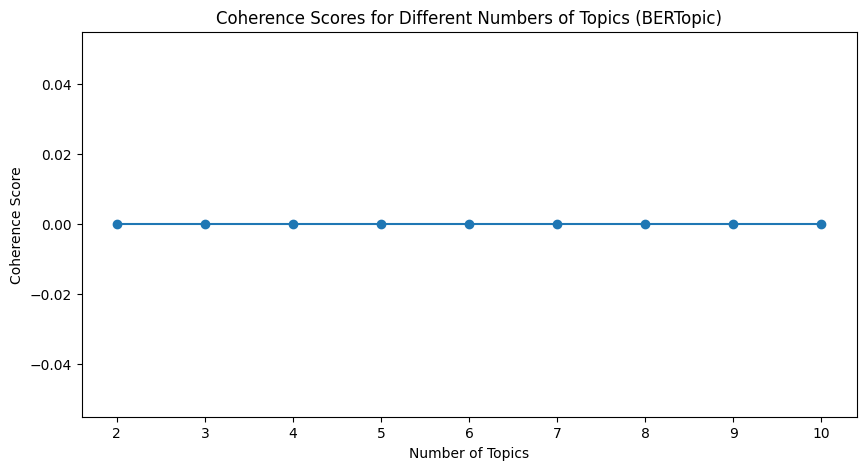


Optimal number of topics: 2

Summary of Topics:
   Topic                 Name  Count
0     -1  -1_is_to_new_global     10

Keywords for Each Topic:
Topic 0: No keywords available.
Topic 1: No keywords available.


In [ ]:
# Load your data
data = pd.read_csv('/content/sample_text_data.csv')  # Replace with your data file
documents = data['text'].values.tolist()

# Initialize BERTopic model
topic_model = BERTopic()

# Fit BERTopic model
topics, probabilities = topic_model.fit_transform(documents)

# Define function to compute coherence score with check for empty topics
def compute_coherence_bertopic(topic_model, documents):
    topics = topic_model.get_topics()
    # Filter out empty or invalid topics
    topic_words = [[word for word, _ in topics[topic]] for topic in topics if topic != -1 and topics[topic]]
    if not topic_words:  # Check if there are valid topics
        return 0.0
    dictionary = corpora.Dictionary([doc.split() for doc in documents])
    coherence_model = CoherenceModel(topics=topic_words, texts=[doc.split() for doc in documents],
                                     dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Calculate coherence scores for a range of topics
coherence_values = []
topic_range = range(2, 11)

for k in topic_range:
    reduced_model = topic_model.reduce_topics(documents, nr_topics=k)
    # Only compute coherence if the reduced model has topics
    if len(reduced_model.get_topic_info()) > 0:
        coherence = compute_coherence_bertopic(reduced_model, documents)
        coherence_values.append(coherence)
        print(f"Coherence Score for {k} topics: {coherence}")
    else:
        print(f"Reduced model with {k} topics has no valid topics.")

# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores for Different Numbers of Topics (BERTopic)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.show()

# Optimal number of topics
if coherence_values:  # Ensure coherence_values is not empty
    optimal_k = topic_range[coherence_values.index(max(coherence_values))]
    print(f"\nOptimal number of topics: {optimal_k}")

    # Train final BERTopic model with optimal topics
    optimal_model = topic_model.reduce_topics(documents, nr_topics=optimal_k)

    # Get topic information
    topics_info = optimal_model.get_topic_info()
    print("\nSummary of Topics:")
    print(topics_info[['Topic', 'Name', 'Count']])

    # Display keywords for each topic, ensuring only valid topics are included
    print("\nKeywords for Each Topic:")
    for topic_num in range(optimal_k):
        topic = optimal_model.get_topic(topic_num)
        if topic:  # Check if the topic is valid and contains words
            keywords = ', '.join([word for word, _ in topic])
            print(f'Topic {topic_num}: {keywords}')
        else:
            print(f'Topic {topic_num}: No keywords available.')
else:
    print("No coherence values were calculated.")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''